# Assignment2 - Supervised Learning flow

# Part 1 - Student details:
* Please write the First Name and last 4 digits of the i.d. for each student. For example:
<pre>Israel 9812</pre>

In [497]:
# student 1: Omri 8652
# student 2: Yahav 0093

## Part 2 - Initial Preparations 
You could add as many code cells as needed

In [498]:
# Pandas Modules
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# M.L Modules
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import  mean_absolute_error
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier


In [499]:
df_train=pd.read_csv("data/cancer_train.csv")
df_test=pd.read_csv("data/cancer_train.csv")



In [500]:
len(df_train)

455

In [501]:
df_test.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,13.170,18.66,85.98,534.6,0.11580,0.12310,0.12260,0.07340,0.2128,0.06777,...,27.95,102.80,759.4,0.1786,0.4166,0.5006,0.20880,0.3900,0.11790,0
1,9.667,18.49,61.49,289.1,0.08946,0.06258,0.02948,0.01514,0.2238,0.06413,...,25.62,70.88,385.2,0.1234,0.1542,0.1277,0.06560,0.3174,0.08524,1
2,20.090,23.86,134.70,1247.0,0.10800,0.18380,0.22830,0.12800,0.2249,0.07469,...,29.43,158.80,1696.0,0.1347,0.3391,0.4932,0.19230,0.3294,0.09469,0
3,8.950,15.76,58.74,245.2,0.09462,0.12430,0.09263,0.02308,0.1305,0.07163,...,17.07,63.34,270.0,0.1179,0.1879,0.1544,0.03846,0.1652,0.07722,1
4,18.030,16.85,117.50,990.0,0.08947,0.12320,0.10900,0.06254,0.1720,0.05780,...,22.02,133.30,1292.0,0.1263,0.2666,0.4290,0.15350,0.2842,0.08225,0


In [502]:
df_train.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,13.170,18.66,85.98,534.6,0.11580,0.12310,0.12260,0.07340,0.2128,0.06777,...,27.95,102.80,759.4,0.1786,0.4166,0.5006,0.20880,0.3900,0.11790,0
1,9.667,18.49,61.49,289.1,0.08946,0.06258,0.02948,0.01514,0.2238,0.06413,...,25.62,70.88,385.2,0.1234,0.1542,0.1277,0.06560,0.3174,0.08524,1
2,20.090,23.86,134.70,1247.0,0.10800,0.18380,0.22830,0.12800,0.2249,0.07469,...,29.43,158.80,1696.0,0.1347,0.3391,0.4932,0.19230,0.3294,0.09469,0
3,8.950,15.76,58.74,245.2,0.09462,0.12430,0.09263,0.02308,0.1305,0.07163,...,17.07,63.34,270.0,0.1179,0.1879,0.1544,0.03846,0.1652,0.07722,1
4,18.030,16.85,117.50,990.0,0.08947,0.12320,0.10900,0.06254,0.1720,0.05780,...,22.02,133.30,1292.0,0.1263,0.2666,0.4290,0.15350,0.2842,0.08225,0


In [503]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 455 entries, 0 to 454
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              455 non-null    float64
 1   mean texture             455 non-null    float64
 2   mean perimeter           455 non-null    float64
 3   mean area                455 non-null    float64
 4   mean smoothness          455 non-null    float64
 5   mean compactness         455 non-null    float64
 6   mean concavity           455 non-null    float64
 7   mean concave points      455 non-null    float64
 8   mean symmetry            455 non-null    float64
 9   mean fractal dimension   455 non-null    float64
 10  radius error             455 non-null    float64
 11  texture error            455 non-null    float64
 12  perimeter error          455 non-null    float64
 13  area error               455 non-null    float64
 14  smoothness error         4

In [504]:
df_train.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
count,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,...,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000
mean,14.257910,19.482835,92.876220,668.580440,0.096224,0.105452,0.090853,0.050013,0.181970,0.062671,...,25.905626,108.558462,903.095165,0.132501,0.257053,0.276415,0.116064,0.290950,0.083924,0.608791
std,3.613344,4.261633,24.922646,364.587131,0.013793,0.053892,0.081118,0.039727,0.027895,0.006930,...,6.149887,34.615237,594.101449,0.022603,0.159287,0.208508,0.065882,0.061539,0.018236,0.488558
min,6.981000,10.380000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.116700,0.049960,...,12.490000,50.410000,185.200000,0.081250,0.034320,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.725000,16.390000,75.265000,422.300000,0.086210,0.065600,0.029700,0.020610,0.162000,0.057660,...,21.355000,84.405000,516.450000,0.116200,0.147750,0.115450,0.065280,0.251000,0.071250,0.000000
50%,13.460000,19.020000,87.160000,559.200000,0.095090,0.094530,0.063350,0.033340,0.179400,0.061400,...,25.500000,97.670000,697.700000,0.131200,0.216700,0.232200,0.101200,0.282200,0.079480,1.000000
75%,16.150000,21.960000,106.850000,807.450000,0.105000,0.130150,0.134150,0.077440,0.195950,0.066180,...,30.285000,127.750000,1151.500000,0.146400,0.341600,0.385300,0.161950,0.319600,0.092130,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.144700,0.345400,0.426800,0.201200,0.304000,0.095750,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.170000,0.291000,0.577400,0.207500,1.000000


In [505]:
#low varience feature
max_var=0
for col in df_train:
    if(df_train[col].std()<(df_train[col].mean()*0.1)):
        print(f"the var of {col} is: ",df_train[col].var())
    



In [506]:
fig, axes = plt.subplots(8, 4, figsize=(15, 20), constrained_layout=True)

for i, col in enumerate(df_train):
    row = i // 4  
    col_num = i % 4
    ax = axes[row, col_num]
    
    sns.boxplot(y=df_train[col], ax=ax)
    ax.set_title(f'{col} BOXPLOT')
    ax.set_ylim(bottom=0, top=df_train[col].max() * 1.30)

plt.show()

In [ ]:

for col in df_train.columns:
    upper_bound = df_train[col].mean() + 3 * df_train[col].std()
    lower_bound = df_train[col].mean() - 3 * df_train[col].std()
    
    df_train = df_train[(df_train[col] <= upper_bound) & (df_train[col] >= lower_bound)]


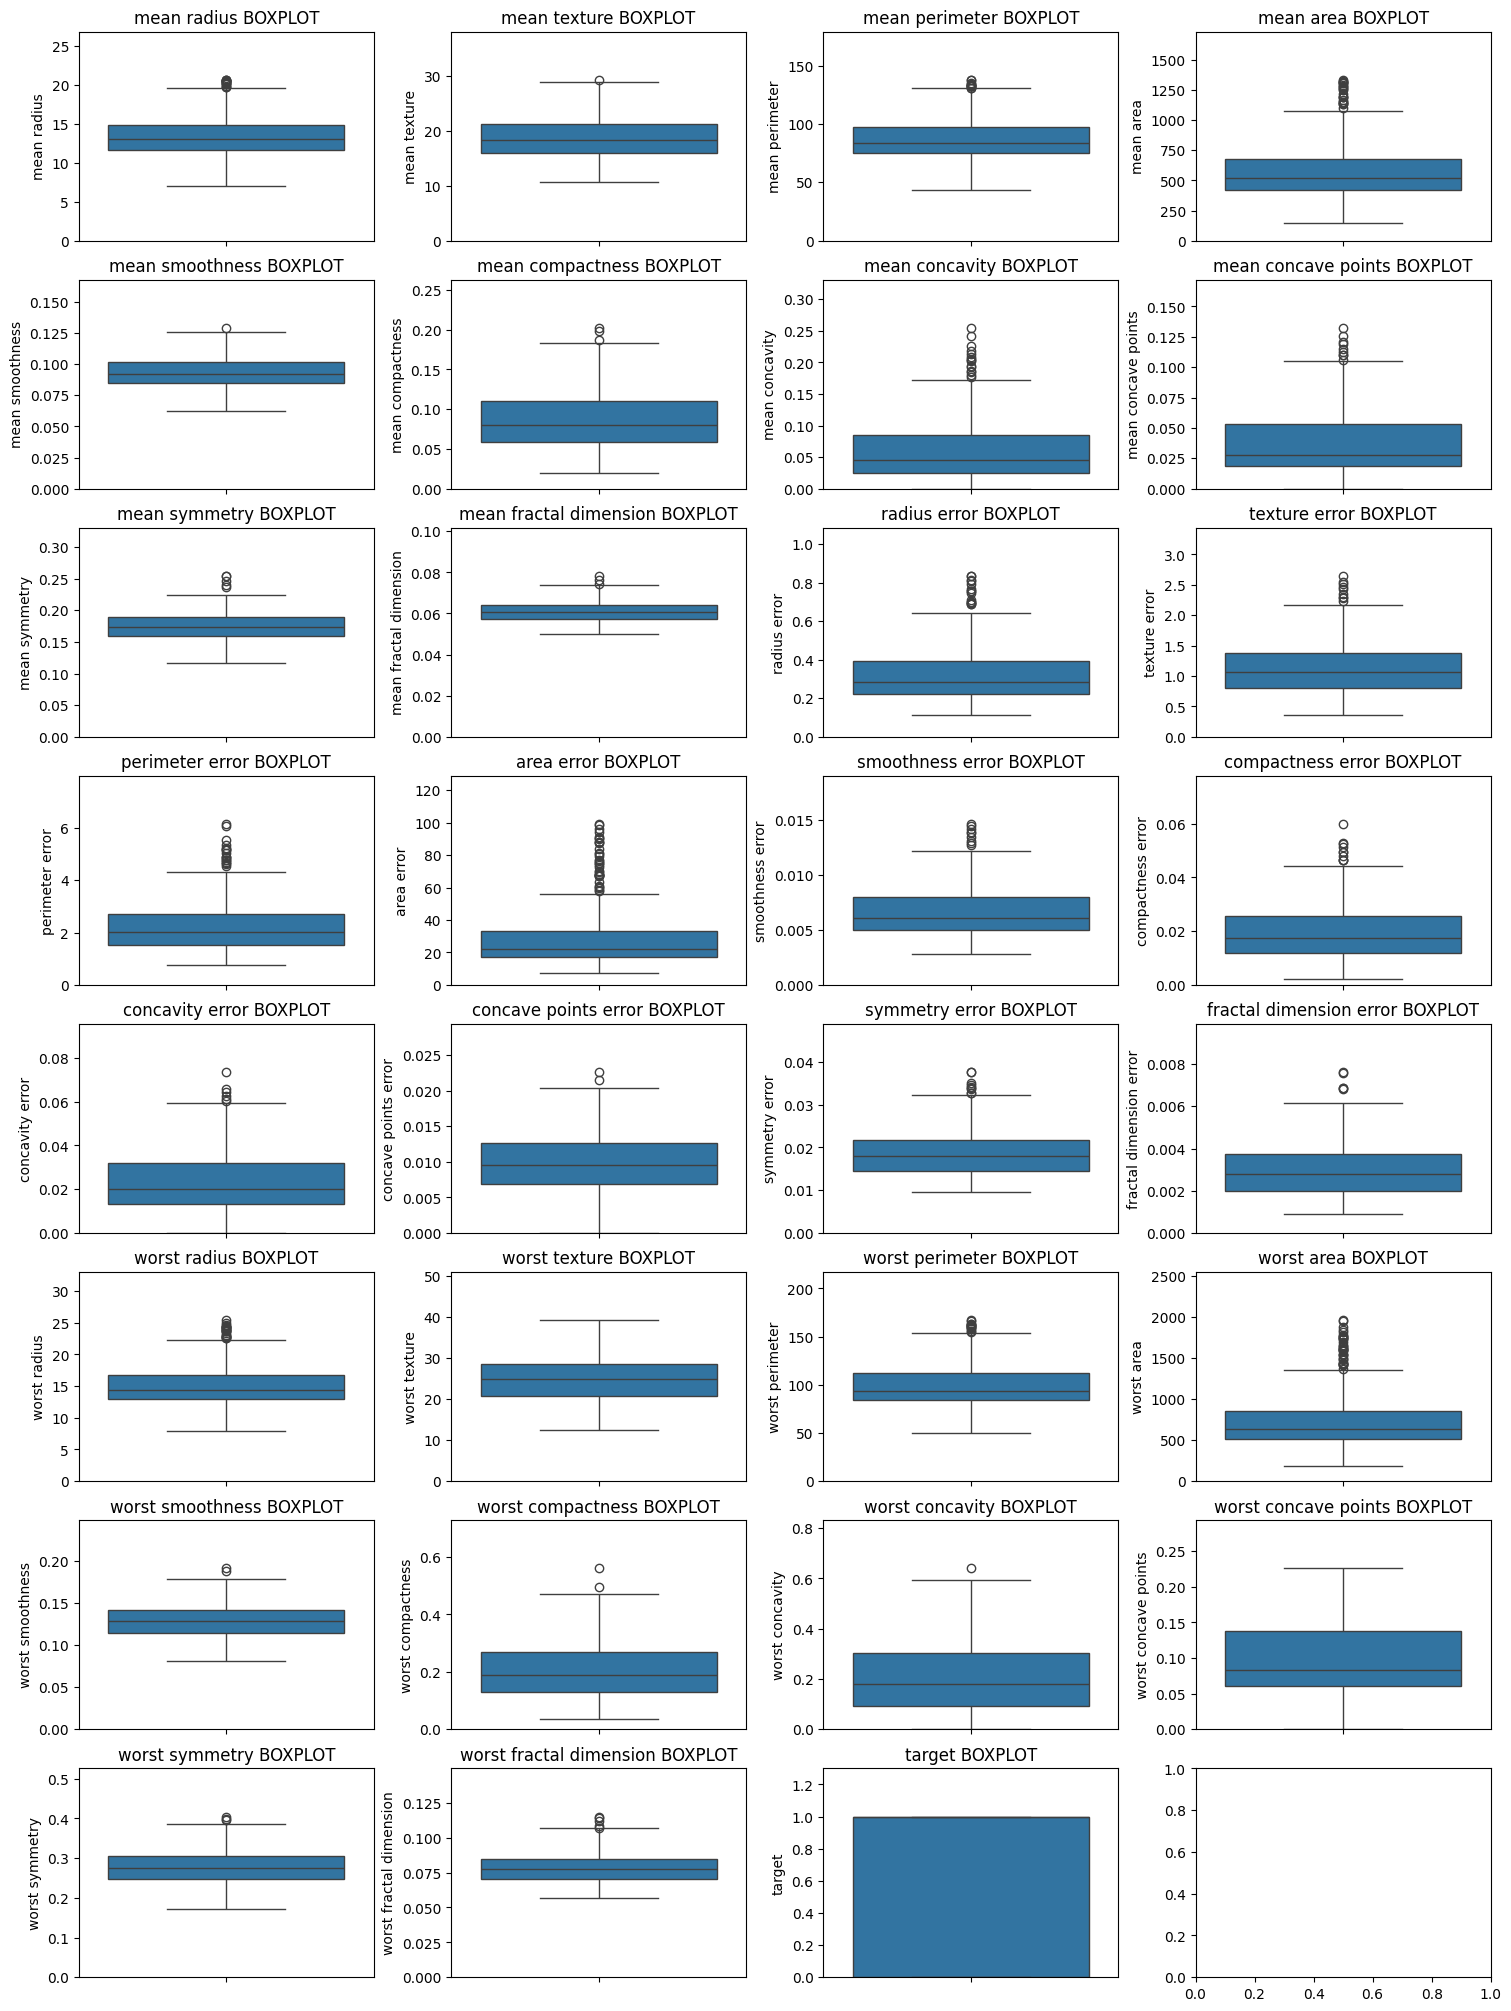

In [ ]:
fig, axes = plt.subplots(8, 4, figsize=(15, 20), constrained_layout=True)

for i, col in enumerate(df_train):
    row = i // 4  
    col_num = i % 4
    ax = axes[row, col_num]
    
    sns.boxplot(y=df_train[col], ax=ax)
    ax.set_title(f'{col} BOXPLOT')
    ax.set_ylim(bottom=0, top=df_train[col].max() * 1.30)

plt.show()

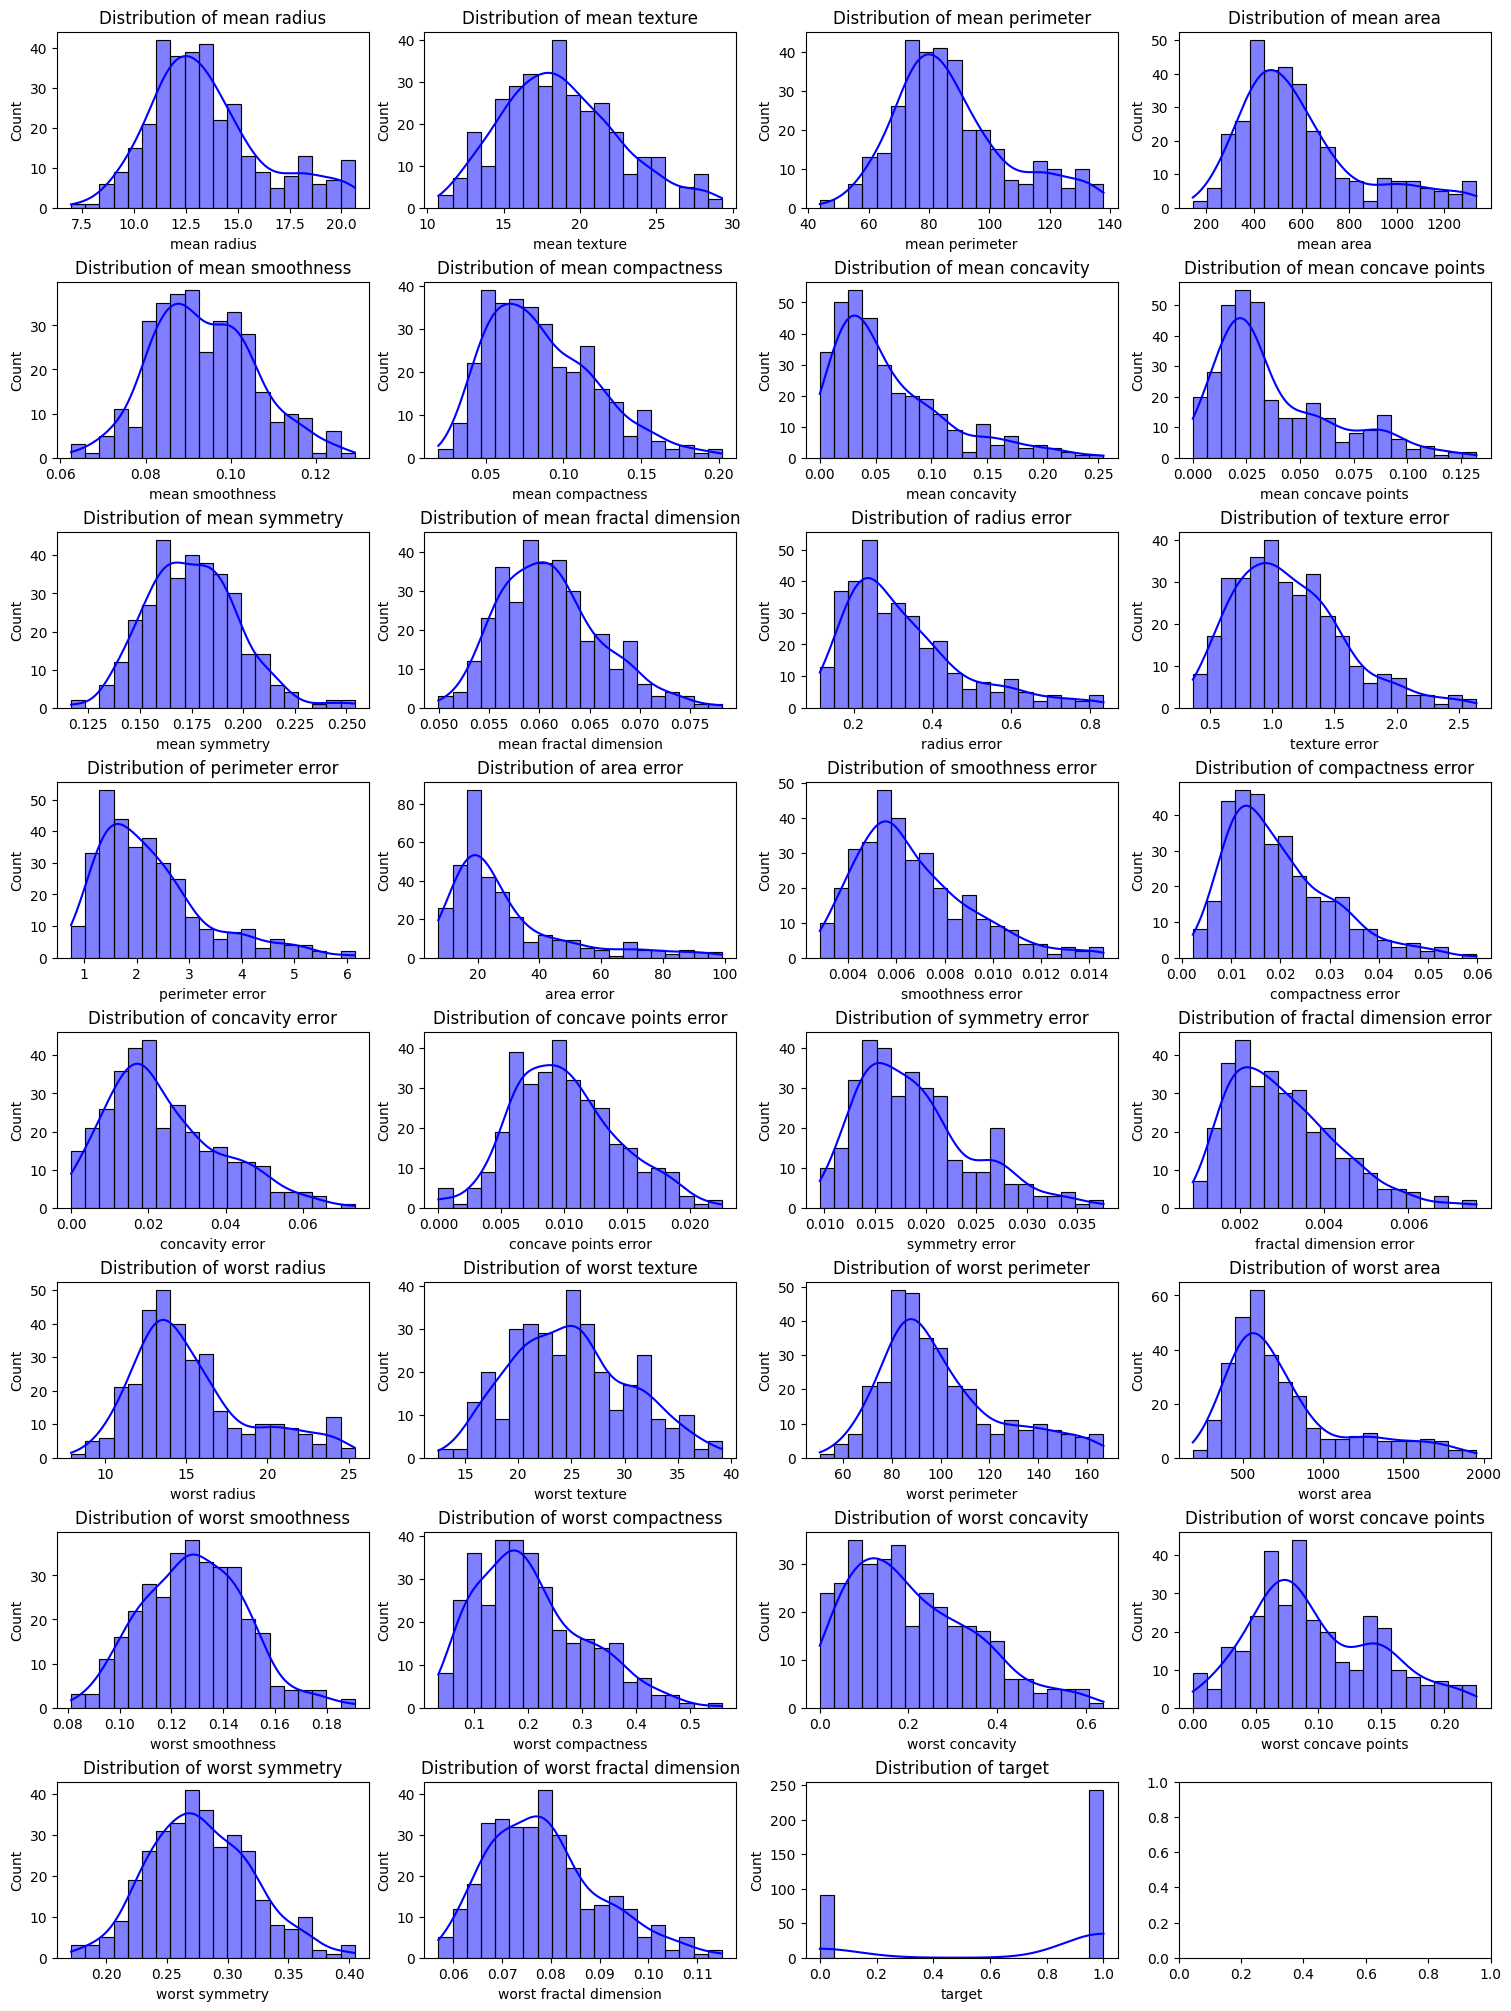

In [ ]:
fig, axes = plt.subplots(8, 4, figsize=(15, 20), constrained_layout=True)

for i, col in enumerate(df_train):
    row = i // 4
    col_num = i % 4
    ax = axes[row, col_num]

    sns.histplot(df_train[col], bins=20, kde=True, color='blue', ax=ax)
    ax.set_title(f'Distribution of {col}')
    ax.set_xlabel(f'{col}')
    ax.set_ylabel('Count')
plt.show()

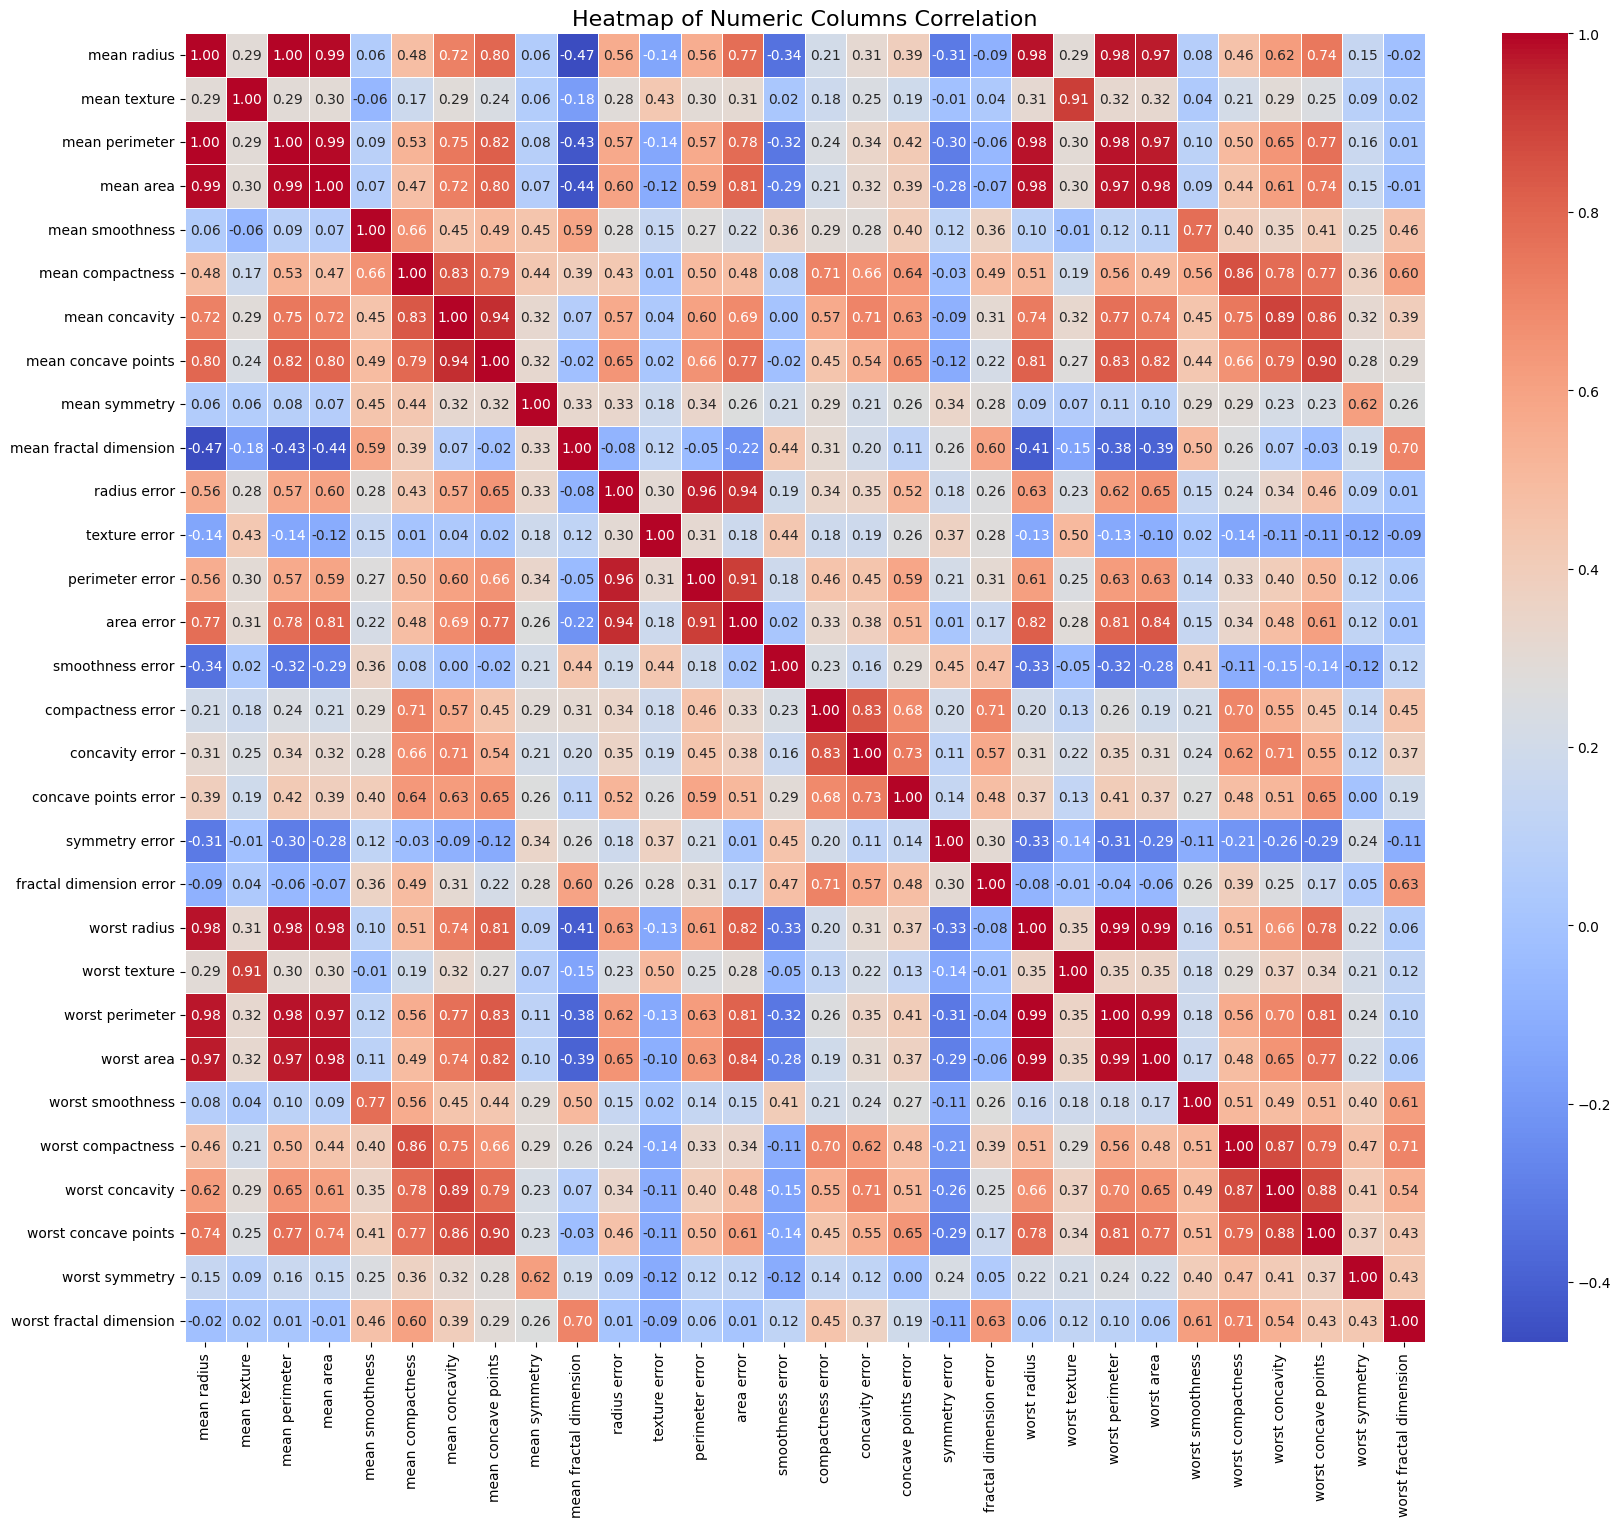

In [ ]:
corr_matrix = df_train.drop(columns={'target'}).corr()
plt.figure(figsize=(20, 17))  
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', annot_kws={"size": 10}, linewidths=0.5)
plt.title('Heatmap of Numeric Columns Correlation', fontsize=16)
plt.show()

In [ ]:
print(corr_matrix)


                         mean radius  mean texture  mean perimeter  mean area  \
mean radius                 1.000000      0.290057        0.998552   0.992423   
mean texture                0.290057      1.000000        0.292816   0.300187   
mean perimeter              0.998552      0.292816        1.000000   0.991145   
mean area                   0.992423      0.300187        0.991145   1.000000   
mean smoothness             0.059494     -0.064196        0.092946   0.065729   
mean compactness            0.482694      0.174839        0.525841   0.472568   
mean concavity              0.715147      0.287821        0.745678   0.724738   
mean concave points         0.797395      0.242242        0.821443   0.803720   
mean symmetry               0.058026      0.063215        0.080595   0.069481   
mean fractal dimension     -0.467735     -0.176645       -0.432561  -0.444114   
radius error                0.561693      0.284043        0.570434   0.598086   
texture error              -

In [ ]:
import numpy as np

# Assuming 'corr_matrix' is your correlation matrix (in pandas DataFrame format)
threshold = 0.7  # Set your correlation threshold
high_corr_pairs = []  # To store the high correlation pairs


# Loop over the matrix
for i in range(len(corr_matrix.columns)):
    for j in range(i+1, len(corr_matrix.columns)):  # Avoid duplicates and self-correlation
        if abs(corr_matrix.iloc[i, j]) > threshold:
            feature_pair = (corr_matrix.columns[i], corr_matrix.columns[j])
            correlation_value = corr_matrix.iloc[i, j]
            high_corr_pairs.append((feature_pair, correlation_value))

# Print all high correlation pairs
for pair, value in high_corr_pairs:
    print(f"Features {pair[0]} and {pair[1]} have a correlation of {value:.2f}")
    
 mean area
 mean perimeter
 mean concavity
 mean concave points
 area error
 worst radius
 worst perimeter
 worst area
 worst concave points
compactness error
worst compactness
worst concavity
concave points error
worst texture
worst smoothness
worst fractal dimension



Features mean radius and mean perimeter have a correlation of 1.00
Features mean radius and mean area have a correlation of 0.99
Features mean radius and mean concavity have a correlation of 0.72
Features mean radius and mean concave points have a correlation of 0.80
Features mean radius and area error have a correlation of 0.77
Features mean radius and worst radius have a correlation of 0.98
Features mean radius and worst perimeter have a correlation of 0.98
Features mean radius and worst area have a correlation of 0.97
Features mean radius and worst concave points have a correlation of 0.74
Features mean texture and worst texture have a correlation of 0.91
Features mean perimeter and mean area have a correlation of 0.99
Features mean perimeter and mean concavity have a correlation of 0.75
Features mean perimeter and mean concave points have a correlation of 0.82
Features mean perimeter and area error have a correlation of 0.78
Features mean perimeter and worst radius have a correlati

## Part 3 - Experiments
You could add as many code cells as needed

In [ ]:
#col_to_drop={'target','worst fractal dimension','compactness error','worst smoothness', 'concave points error', 'worst concavity', 'mean concavity','worst texture','worst concave points','mean concave points', 'radius error','area error','mean perimeter','mean area','worst radius','worst perimeter','worst area'}
#col_to_drop={'target','worst fractal dimension','mean compactness'	,'mean symmetry'	,'concavity error'	,'fractal dimension error'	,'worst compactness'	,'worst symmetry','compactness error','worst smoothness','mean smoothness','mean fractal dimension'	,'texture error'	,'perimeter error','smoothness error', 'concave points error', 'worst concavity','symmetry error', 'mean concavity','worst texture','worst concave points','mean concave points', 'radius error','area error','mean perimeter','mean area','worst radius','worst perimeter','worst area','mean texture'}
col_to_drop=[
    'target',
    'mean area',
    'mean perimeter',
    'mean concavity',
    'mean concave points',
    'area error',
    'worst radius',
    'worst perimeter',
    'worst area',
    'worst concave points',
    'compactness error',
    'worst compactness',
    'worst concavity',
    'concave points error',
    'worst texture',
    'worst smoothness',
    'worst fractal dimension'
]
y_train=df_train['target']
X_train=df_train.drop(columns=col_to_drop)

y_test=df_test['target']
X_test=df_test.drop(columns=col_to_drop)
X_test

,mean radius,mean texture,mean smoothness,mean compactness,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,smoothness error,concavity error,symmetry error,fractal dimension error,worst symmetry
0,13.170,18.66,0.11580,0.12310,0.2128,0.06777,0.2871,0.8937,1.8970,0.006532,0.02905,0.01743,0.003643,0.3900
1,9.667,18.49,0.08946,0.06258,0.2238,0.06413,0.3776,1.3500,2.5690,0.007501,0.02714,0.01960,0.003913,0.3174
2,20.090,23.86,0.10800,0.18380,0.2249,0.07469,1.0720,1.7430,7.8040,0.007964,0.07649,0.02736,0.005928,0.3294
3,8.950,15.76,0.09462,0.12430,0.1305,0.07163,0.3132,0.9789,3.2800,0.018350,0.09263,0.02384,0.005601,0.1652
4,18.030,16.85,0.08947,0.12320,0.1720,0.05780,0.2986,0.5906,1.9210,0.004117,0.02975,0.01295,0.002436,0.2842
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
450,23.090,19.83,0.09342,0.12750,0.1505,0.05484,1.2910,0.7452,9.6350,0.005753,0.03976,0.02201,0.002897,0.2908
451,11.360,17.57,0.08858,0.05313,0.1601,0.05913,0.1916,1.5550,1.3590,0.005391,0.01163,0.01341,0.001659,0.2973
452,23.270,22.04,0.08439,0.11450,0.1801,0.05553,0.6642,0.8561,4.6030,0.004910,0.02822,0.01956,0.003740,0.3589
453,12.360,18.54,0.08477,0.06815,0.1602,0.06066,0.1199,0.8944,0.8484,0.003457,0.01167,0.01251,0.001356,0.2983


In [ ]:
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.fit_transform(X_test)

In [ ]:
import numpy as np
param_grid_nb = {
    'var_smoothing': np.logspace(0,-9, num=100)
}
param_grid_nb

{'var_smoothing': array([1.00000000e+00, 8.11130831e-01, 6.57933225e-01, 5.33669923e-01,
        4.32876128e-01, 3.51119173e-01, 2.84803587e-01, 2.31012970e-01,
        1.87381742e-01, 1.51991108e-01, 1.23284674e-01, 1.00000000e-01,
        8.11130831e-02, 6.57933225e-02, 5.33669923e-02, 4.32876128e-02,
        3.51119173e-02, 2.84803587e-02, 2.31012970e-02, 1.87381742e-02,
        1.51991108e-02, 1.23284674e-02, 1.00000000e-02, 8.11130831e-03,
        6.57933225e-03, 5.33669923e-03, 4.32876128e-03, 3.51119173e-03,
        2.84803587e-03, 2.31012970e-03, 1.87381742e-03, 1.51991108e-03,
        1.23284674e-03, 1.00000000e-03, 8.11130831e-04, 6.57933225e-04,
        5.33669923e-04, 4.32876128e-04, 3.51119173e-04, 2.84803587e-04,
        2.31012970e-04, 1.87381742e-04, 1.51991108e-04, 1.23284674e-04,
        1.00000000e-04, 8.11130831e-05, 6.57933225e-05, 5.33669923e-05,
        4.32876128e-05, 3.51119173e-05, 2.84803587e-05, 2.31012970e-05,
        1.87381742e-05, 1.51991108e-05, 1.23284

In [ ]:
gnb=GaussianNB()

In [ ]:
gs_gnb = GridSearchCV(gnb, param_grid_nb, cv=5, scoring='f1_macro')

In [ ]:
gs_gnb.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=GaussianNB(),
             param_grid={'var_smoothing': array([1.00000000e+00, 8.11130831e-01, 6.57933225e-01, 5.33669923e-01,
       4.32876128e-01, 3.51119173e-01, 2.84803587e-01, 2.31012970e-01,
       1.87381742e-01, 1.51991108e-01, 1.23284674e-01, 1.00000000e-01,
       8.11130831e-02, 6.57933225e-02, 5.33669923e-02, 4.32876128e-02,
       3.51119173e-02, 2.84803587e-02, 2.31...
       1.23284674e-07, 1.00000000e-07, 8.11130831e-08, 6.57933225e-08,
       5.33669923e-08, 4.32876128e-08, 3.51119173e-08, 2.84803587e-08,
       2.31012970e-08, 1.87381742e-08, 1.51991108e-08, 1.23284674e-08,
       1.00000000e-08, 8.11130831e-09, 6.57933225e-09, 5.33669923e-09,
       4.32876128e-09, 3.51119173e-09, 2.84803587e-09, 2.31012970e-09,
       1.87381742e-09, 1.51991108e-09, 1.23284674e-09, 1.00000000e-09])},
             scoring='f1_macro')

In [ ]:
best_gnb=gs_gnb.best_estimator_

In [ ]:
y_pred=best_gnb.predict(X_test)

In [ ]:
comapre_df=pd.DataFrame({'y_test':y_test,'y_pred':y_pred})
comapre_df.head(20)

,y_test,y_pred
0,0,1
1,1,1
2,0,0
3,1,1
4,0,1
5,1,1
6,1,1
7,0,1
8,0,0
9,0,0


In [ ]:
best_gnb.score(X_test,y_test)

0.8725274725274725

In [ ]:
knn=KNeighborsClassifier()

In [ ]:
param_grid_knn = {
    'n_neighbors':[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]
}

In [ ]:
knn_gs=GridSearchCV(knn,param_grid_knn,cv=5,scoring='f1_macro')

In [ ]:
knn_gs.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20]},
             scoring='f1_macro')

In [ ]:
knn_gs.best_params_

{'n_neighbors': 8}

In [ ]:
best_knn=knn_gs.best_estimator_

In [ ]:
y_pred=best_knn.predict(X_test)
comapre_df=pd.DataFrame({'y_test':y_test,'y_pred':y_pred})
comapre_df.head(20)

,y_test,y_pred
0,0,1
1,1,1
2,0,0
3,1,1
4,0,1
5,1,1
6,1,1
7,0,0
8,0,0
9,0,0


In [ ]:
best_knn.score(X_test,y_test)

0.8901098901098901

## Part 4 - Training 
Use the best combination of feature engineering, model (algorithm and hyperparameters) from the experiment part (part 3)

In [ ]:
gnb=GaussianNB(var_smoothing=0.12328467394420659)

In [ ]:
best_gnb=gnb.fit(X=X_train,y=y_train)

In [ ]:
knn = KNeighborsClassifier(n_neighbors=knn_gs.best_params_['n_neighbors'])

In [ ]:
best_knn=knn.fit(X=X_train,y=y_train)

## Part 5 - Apply on test and show model performance estimation

In [ ]:
best_gnb.score(X_test,y_test)

0.8725274725274725

In [ ]:
best_knn.score(X_test,y_test)

0.8901098901098901